In [17]:
import pandas as pd
import numpy as np
import sklearn
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,StackingClassifier,BaggingClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt 


In [18]:
dfgos = pd.read_csv('cellinedata/genedata/goidsdefs.csv')
def getGoDesc(go_id):
    result = dfgos[dfgos['go_id'] == go_id]    
    if not result.empty:
        name = result['name_1006'].values[0]
        if pd.isna(name):
            return 'NONE'
        else:
            return name.lower().replace(' ', '_')   # Convert to lowercase and replace spaces with underscores
    else:
        return 'NOGO'
dfgos.head(2)


,Unnamed: 0,go_id,name_1006,definition_1006
0,1,GO:0030533,triplet codon-amino acid adaptor activity,The codon binding activity of a tRNA that posi...
1,2,GO:0006412,translation,The cellular metabolic process in which a prot...


In [19]:
chipseqfile='chipseq/BREAST_CHIPSEQ.csv'

In [20]:
CELLLINE='ACH-000768'
CELLINENAME='MDA-MB-231'
CELLTISSUE='BREAST'
DRUG='UF010'
seqfile='rnaseq/UF010.csv'
genefile='cellinedata/MDA-MB-231.csv'


In [21]:
DRUGS=['YX6862','YX968','UF010']

In [22]:
 feature_mapping = {
        'rnaexp': 'RNA_Expression_Public',
        'copynumber': 'WES_log_copy_number',
        'crisprcas9': 'CRISPR-Cas9_Gene_Knockout_Dependency',
        'rnai': 'RNAi_Dependency' ,
        'ccleexp':'CCLE_TPM_RNA-Seq',
        'methylation':'CCLE_Methylation',
        'proteingygi':'CCLE_Protein_Gygi ',
        'proteinrpna':'CCLE_Protein_RPPA',
        'sangercfgs':'Sanger_CFGs',
        'percentage_gene_gc_content':'Percentage_gene_gc_content',
        'breast_ATAC-seq':'Breast_ATAC-Seq', 
        'breast_chipreq_H3K4me1':'Breast_ChIP-Seq_H3K4me1', 
        'breast_chipreq_H3K4me3':'Breast_ChIP-Seq_H3K4me3',
        'breast_chipreq_H3K9me3':'Breast_ChIP-Seq_H3K9me3',
        'breast_DNase-seq':'Breast_DNase-Seq',
        'breast_tfchipseq_CTCF':'Breast_TF_ChIP-Seq_CTCF',
        'breast_tfchipseq_POLR2A':'Breast_TF_ChIP-Seq_POLR2A', 
        'breast_tfchipseq_POLR2AphosphoS5':'Breast_TF_ChIP-Seq_POLR2AphosphoS5'      
        
        }

def get_feature_description(feature_label, feature_mapping):
    return feature_mapping.get(feature_label, feature_label)




-----------------------------------------------
YX6862

common_go_ids 3080
final_data (19696, 3040)
Duplicated columns in features: Index(['methylation'], dtype='object')

DOWN
percentage_gene_gc_content 0.08913715455641774
rnaexp 0.07274999681406338
ccleexp 0.06989049902794706
breast_chipreq_H3K4me3 0.04403442862885942
breast_ATAC-seq 0.0388462740513434
copynumber 0.03724086823047648
crisprcas9 0.03411382589550902
sangercfgs 0.03232677723759805
proteingygi 0.029838095688323282
rnai 0.029366916167171596
breast_chipreq_H3K4me1 0.02423650014920626
breast_tfchipseq_POLR2AphosphoS5 0.023095439135857588
breast_tfchipseq_CTCF 0.017356190850923305
breast_chipreq_H3K9me3 0.016323027238214046
breast_tfchipseq_POLR2A 0.010681222821583758
protein_binding 0.008911979619190743
rna_binding 0.006141180568321992
methylation 0.005331094642323291
metal_ion_binding 0.003813068547307597
translation 0.0036326291067707637
structural_constituent_of_ribosome 0.003186012588910973
atp_binding 0.0030733342730218

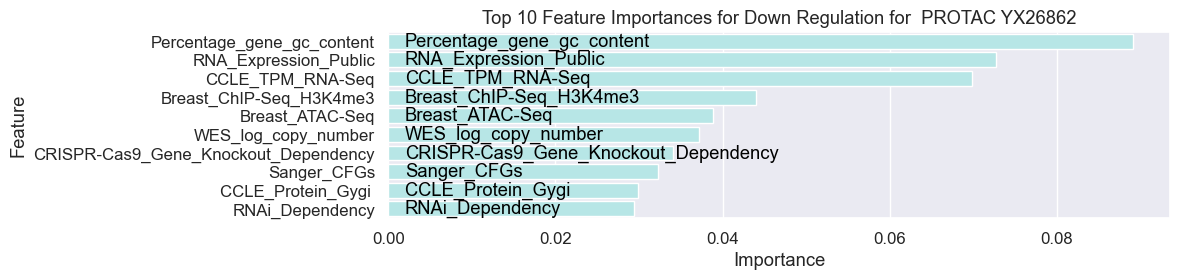


UP
percentage_gene_gc_content 0.13047568627063277
ccleexp 0.04639089466879609
rnaexp 0.044154766742914305
breast_chipreq_H3K4me3 0.04266498195389496
breast_ATAC-seq 0.04115336703917503
breast_chipreq_H3K4me1 0.033241325343458444
copynumber 0.03272157415007168
sangercfgs 0.03210035489119259
crisprcas9 0.030576722404663727
rnai 0.02845511570374168
proteingygi 0.023104808929216472
breast_chipreq_H3K9me3 0.021492488044240008
breast_tfchipseq_POLR2AphosphoS5 0.019478593482268814
breast_tfchipseq_CTCF 0.018651140297262787
breast_tfchipseq_POLR2A 0.012116921957181923
protein_binding 0.008190707977953118
methylation 0.005794741988714548
metal_ion_binding 0.004315212265342506
rna_binding 0.0036622509285575942
atp_binding 0.00291575549809899
identical_protein_binding 0.0025537052214682126
biological_process 0.0023136410385093302
dna_binding 0.002253892285363436
positive_regulation_of_transcription_by_rna_polymerase_ii 0.0021254834685891628
regulation_of_transcription_by_rna_polymerase_ii 0.0021

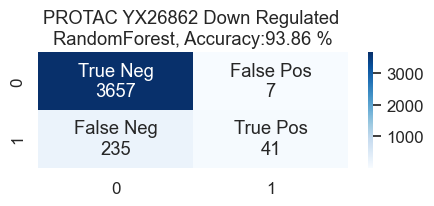

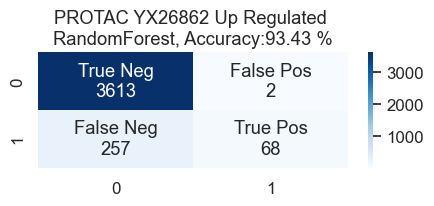

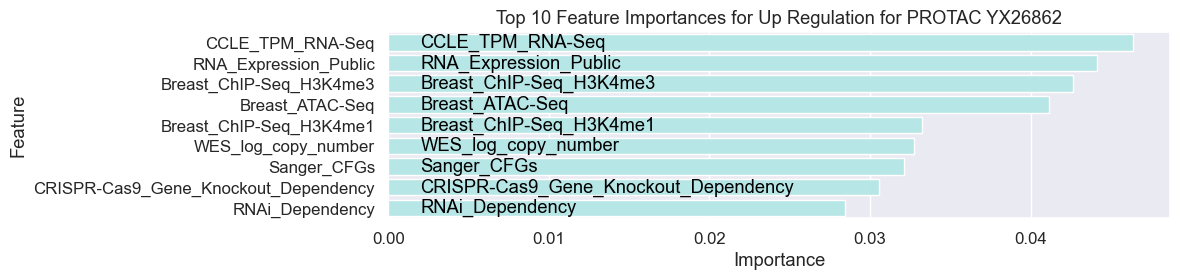

-----------------------------------------------
YX968

common_go_ids 3089
final_data (19821, 3049)
Duplicated columns in features: Index(['methylation'], dtype='object')

DOWN
rnaexp 0.0681818564479718
ccleexp 0.0678007681322794
breast_chipreq_H3K4me3 0.039188423803759455
breast_ATAC-seq 0.03775579690861233
percentage_gene_gc_content 0.03619888815963054
sangercfgs 0.03497484470409767
crisprcas9 0.03468679704473357
breast_chipreq_H3K4me1 0.033389729245120604
rnai 0.03311995789235593
proteingygi 0.031824116214588735
copynumber 0.028570009006571303
breast_tfchipseq_POLR2AphosphoS5 0.026389273176686667
rna_binding 0.020749850820096085
breast_tfchipseq_CTCF 0.019640326311140162
breast_chipreq_H3K9me3 0.013639764979805569
protein_binding 0.011781191711188877
breast_tfchipseq_POLR2A 0.010571898352904445
methylation 0.004553588050692792
structural_constituent_of_ribosome 0.00394000580343859
metal_ion_binding 0.0038278767890715464
identical_protein_binding 0.002802694929026438
negative_regulati

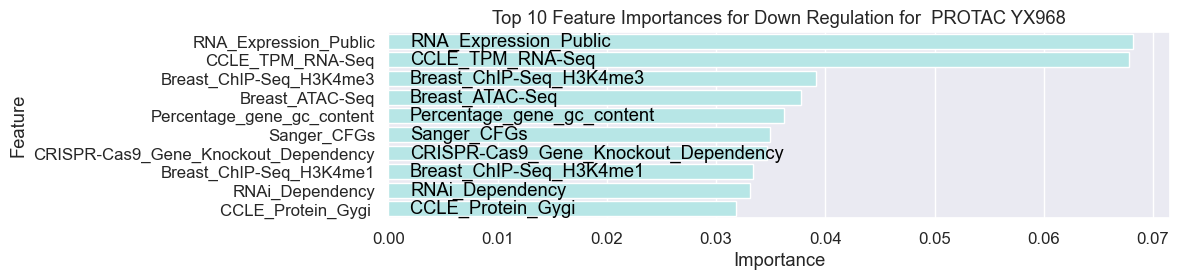


UP
rnaexp 0.06138613742962535
ccleexp 0.056089991575716903
breast_chipreq_H3K4me3 0.050396817004379695
breast_ATAC-seq 0.048784258737305235
percentage_gene_gc_content 0.046101451854185495
crisprcas9 0.03832738209257659
sangercfgs 0.03769916030348683
rnai 0.035079954104272754
copynumber 0.03322316694642787
breast_chipreq_H3K4me1 0.03136761497180667
proteingygi 0.02568527438680197
breast_tfchipseq_POLR2AphosphoS5 0.02268030380049712
breast_tfchipseq_CTCF 0.022306843415450393
breast_chipreq_H3K9me3 0.01893794438148772
breast_tfchipseq_POLR2A 0.014730085751618448
protein_binding 0.008991919540270763
methylation 0.006308679912826818
rna_binding 0.006095384934201549
metal_ion_binding 0.004559994532255494
regulation_of_transcription_by_rna_polymerase_ii 0.0029497953606151847
identical_protein_binding 0.0028196185138275524
molecular_function 0.002812431393045978
rna_polymerase_ii_cis-regulatory_region_sequence-specific_dna_binding 0.002607757318475233
atp_binding 0.00248154146811583
biologica

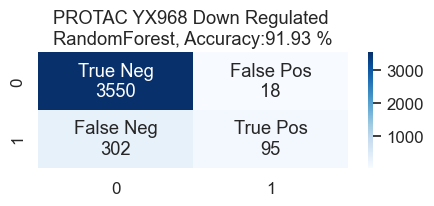

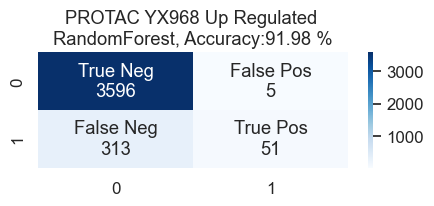

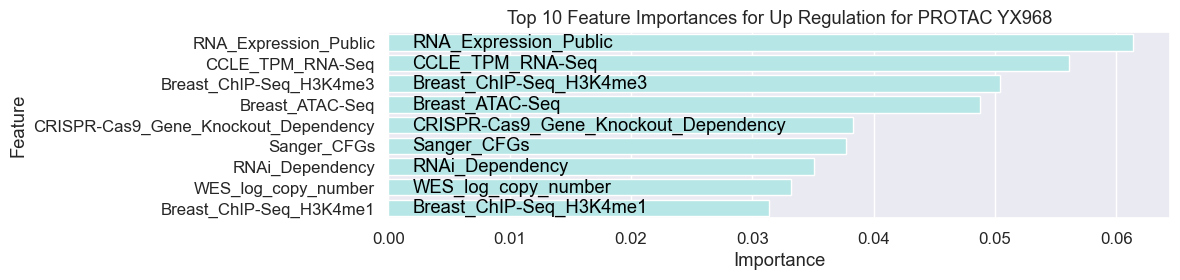

-----------------------------------------------
UF010

common_go_ids 3200
final_data (20798, 3158)
Duplicated columns in features: Index(['methylation'], dtype='object')

DOWN
rnaexp 0.11961118266921776
ccleexp 0.11402775493118686
breast_chipreq_H3K4me3 0.09091952557453023
breast_ATAC-seq 0.0524946990436799
breast_tfchipseq_POLR2AphosphoS5 0.0365699496277825
crisprcas9 0.03243949381801918
proteingygi 0.030737863155364753
breast_chipreq_H3K4me1 0.026786135417932885
percentage_gene_gc_content 0.026531537054574162
sangercfgs 0.02552347090295142
rnai 0.023324308724047612
copynumber 0.02181573508458663
breast_tfchipseq_CTCF 0.01740558014093815
breast_chipreq_H3K9me3 0.01735487427175305
breast_tfchipseq_POLR2A 0.010266630779522147
protein_binding 0.007174173355292571
rna_binding 0.0065039304708242405
methylation 0.0032787848124628456
metal_ion_binding 0.002667984568829448
regulation_of_transcription_by_rna_polymerase_ii 0.002405326291889388
dna_binding 0.0023122960111923996
molecular_functio

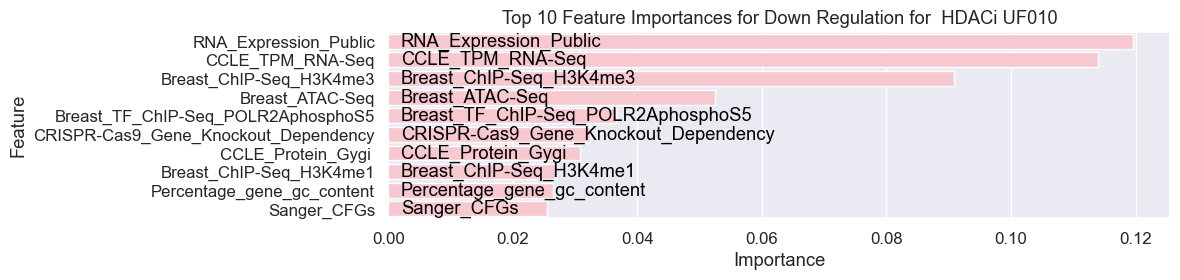


UP
breast_chipreq_H3K4me3 0.05315296891337897
breast_ATAC-seq 0.04965827739890984
ccleexp 0.04664821129474873
rnaexp 0.04496777058121945
percentage_gene_gc_content 0.039104363217750335
crisprcas9 0.03689662730217677
rnai 0.034074202460279146
sangercfgs 0.033512269008597266
copynumber 0.03197490257793975
breast_chipreq_H3K4me1 0.031003113674337317
proteingygi 0.030397350184029795
breast_tfchipseq_POLR2AphosphoS5 0.024091578888433985
breast_tfchipseq_CTCF 0.023060876499203402
breast_chipreq_H3K9me3 0.01979646835782309
breast_tfchipseq_POLR2A 0.013159952985451636
protein_binding 0.008317895005001462
cell_division 0.007607347229417074
methylation 0.005288875089337191
metal_ion_binding 0.004728311256634285
dna_binding 0.003857603657101401
rna_binding 0.0036405025279236877
identical_protein_binding 0.0033944251475132845
atp_binding 0.0031863962238091815
cell_cycle 0.0026396083413293336
signal_transduction 0.002549924608638386
regulation_of_transcription_by_rna_polymerase_ii 0.00252151239275

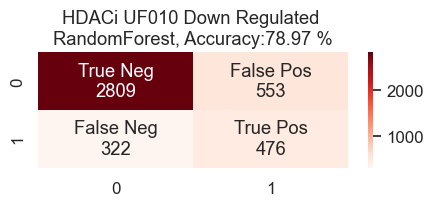

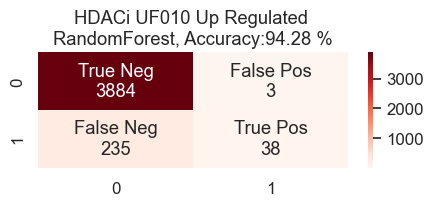

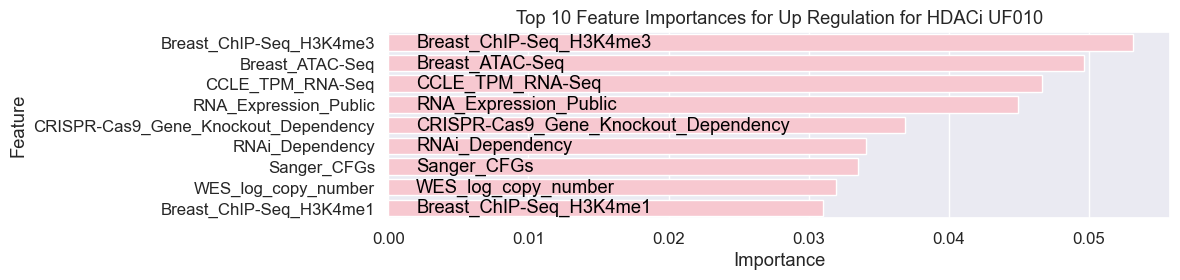

In [24]:
for thedrug in DRUGS:
    DRUG=thedrug
    seqfile='rnaseq/'+thedrug+'.csv'
    Label='PROTAC '+DRUG
    if DRUG=='YX6862':
        Label='PROTAC YX26862'

    barcolor='paleturquoise'
    cfcolor='Blues'
    ML='RandomForest'
    if DRUG=='UF010':
        Label='HDACi UF010'
        barcolor='pink'
        cfcolor='Reds'
    if DRUG=='XXXXYX6862':
        ML='Graph neural network'
        cfcolor='Greens'
    print('-----------------------------------------------')
    print(DRUG)
    print('')
    df_seqfile = pd.read_csv(seqfile)
    df_seqfile['upr'] = df_seqfile['regulated'].apply(lambda x: 1 if x == 'up' else 0)
    df_seqfile['downr'] = df_seqfile['regulated'].apply(lambda x: 1 if x == 'down' else 0)
    df_genefile = pd.read_csv(genefile)
    merged_df = pd.merge(df_seqfile, df_genefile, on='gene', how='left') 
    merged_df.fillna(0, inplace=True)
    merged_df.drop('go_id', axis=1, inplace=True)
    merged_df = merged_df.rename(columns={'GO_IDS': 'go_id'})
    
    df_chipseqfile = pd.read_csv(chipseqfile)
    merged_df = pd.merge(merged_df, df_chipseqfile, on='gene', how='left') 
    merged_df.fillna(0, inplace=True)
    
    
    data=merged_df.copy()
    data['go_id'] = data['go_id'].astype(str)
    all_go_ids = ' '.join(data['go_id']).split()  # Join and split the GO IDs into a list
    go_id_counts = Counter(all_go_ids)  # Count occurrences of each GO ID
    common_go_ids = [go_id for go_id, count in go_id_counts.items() if count > 10]
    print('common_go_ids',len(common_go_ids))
    
    new_columns = {}
    for go_id in common_go_ids:    
        new_columns[getGoDesc(go_id)] = data['go_id'].apply(lambda x: x.split().count(go_id))
    
    len(new_columns)
    new_columns_df = pd.DataFrame(new_columns) 
    final_data = pd.concat([data, new_columns_df], axis=1)
    
    features = final_data.drop(["gene", "go_id", 'upr', 'downr', 'regulated'], axis=1)
    print('final_data',features.shape)

    duplicated_columns = features.columns[features.columns.duplicated()]
    if len(duplicated_columns) > 0:
        print(f"Duplicated columns in features: {duplicated_columns}")
        features = features.loc[:, ~features.columns.duplicated()]
    else:
        print("No duplicated columns in features.")
    
    print("\nDOWN")
    
    target = data["downr"] 
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    rfc = RandomForestClassifier(n_estimators=100, random_state=10, class_weight ='balanced')
    rfc.fit(X_train, y_train)
    pr = rfc.predict(X_test)
    acc=rfc.score(X_test, y_test) 
    cms=confusion_matrix(y_test, pr)
    
    feature_importances = rfc.feature_importances_ 
    sorted_idx = np.argsort(feature_importances)[::-1]
    sorted_features = X_train.columns[sorted_idx]
    sorted_importances = feature_importances[sorted_idx]
    
    for feature, importance in zip(sorted_features[:30], sorted_importances[:30]):
        print(feature, importance)
    
    print(acc)
    print(cms)
    numfeattoshow=10
    feature_importance_df = pd.DataFrame({'Feature': sorted_features[:numfeattoshow], 'Importance': sorted_importances[:numfeattoshow]})
    feature_importance_df=feature_importance_df[feature_importance_df.Feature!='ssspercentage_gene_gc_content']
    feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(lambda x: get_feature_description(x, feature_mapping))

    plt.figure(figsize=(12, 3))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values('Importance', ascending=False), color=barcolor)
    plt.xlabel("Importance")
    plt.title("Top "+str(numfeattoshow)+" Feature Importances for Down Regulation for  "+Label)
    plt.tight_layout()
    # Add labels to the bars (directly on them)
    fi=0
   
 

    for p in ax.patches:
        width = p.get_width()
        feature_index = fi# int(p.get_y()) # Get the index of the feature
        fi=fi+1;
        feature_label = feature_importance_df['Feature'].iloc[feature_index]
        #feature_label = feature_mapping.get(fimp, fimp)  
        plt.text(0.002,  # x-coordinate (center of the bar)
                 p.get_y() + p.get_height() / 2,  # y-coordinate (center of the bar)
                 feature_label,  # Correctly pass the feature label (string)
                 ha='left',  # Horizontal alignment
                 va='center',  # Vertical alignment
                 color='black')  # Text color
    
    
    plt.show()

    
    plt.figure(figsize = (5,1.5))
    plt.title(Label+' Down Regulated \n'+ML+', Accuracy:'+str(round(acc*10000)/100)+' %')

    sns.set(font_scale=1.1)#for label size
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                        cms.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cms, annot=labels, fmt='', cmap=cfcolor)
 
    print("\nUP")
    target = data["upr"] 
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    rfc = RandomForestClassifier(n_estimators=100, random_state=10, class_weight ='balanced')
    rfc.fit(X_train, y_train)
    pr = rfc.predict(X_test)
    acc=rfc.score(X_test, y_test) 
    cms=confusion_matrix(y_test, pr)
    
    feature_importances = rfc.feature_importances_ 
    sorted_idx = np.argsort(feature_importances)[::-1]
    sorted_features = X_train.columns[sorted_idx]
    sorted_importances = feature_importances[sorted_idx]
    
    for feature, importance in zip(sorted_features[:30], sorted_importances[:30]):
        print(feature, importance)
    
    print(acc)
    print(cms) 

    
    plt.figure(figsize = (5,1.5))
    plt.title(Label+' Up Regulated \n'+ML+', Accuracy:'+str(round(acc*10000)/100)+' %')
    sns.set(font_scale=1.1)#for label size
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                        cms.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cms, annot=labels, fmt='', cmap=cfcolor)

    numfeattoshow=10
    feature_importance_df = pd.DataFrame({'Feature': sorted_features[:numfeattoshow], 'Importance': sorted_importances[:numfeattoshow]})
    feature_importance_df=feature_importance_df[feature_importance_df.Feature!='percentage_gene_gc_content']
    feature_importance_df['Feature'] = feature_importance_df['Feature'].apply(lambda x: get_feature_description(x, feature_mapping))

    plt.figure(figsize=(12, 3))
    ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values('Importance', ascending=False), color=barcolor)
    plt.xlabel("Importance")
    plt.title("Top "+str(numfeattoshow)+" Feature Importances for Up Regulation for "+Label)
    plt.tight_layout()
    # Add labels to the bars (directly on them)
    fi=0
    for p in ax.patches:
        width = p.get_width()
        feature_index = fi# int(p.get_y()) # Get the index of the feature
        fi=fi+1;
        #feature_label = feature_importance_df['Feature'].iloc[feature_index]
        feature_label = feature_importance_df['Feature'].iloc[feature_index]
        #feature_label = feature_mapping.get(fimp, fimp)  
        plt.text(0.002,  # x-coordinate (center of the bar)
                 p.get_y() + p.get_height() / 2,  # y-coordinate (center of the bar)
                 feature_label,  # Correctly pass the feature label (string)
                 ha='left',  # Horizontal alignment
                 va='center',  # Vertical alignment
                 color='black')  # Text color
    
    plt.show()


In [14]:
feature_importance_df.head(10)

,Feature,Importance
0,Breast_ChIP-Seq_H3K4me3,0.053153
1,Breast_ATAC-Seq,0.049658
2,CCLE_TPM_RNA-Seq,0.046648
3,RNA_Expression_Public,0.044968
5,CRISPR-Cas9_Gene_Knockout_Dependency,0.036897
6,RNAi_Dependency,0.034074
7,Sanger_CFGs,0.033512
8,WES_log_copy_number,0.031975
9,Breast_ChIP-Seq_H3K4me1,0.031003


<Figure size 640x480 with 0 Axes>



Dependence of Down Regulation on rnai


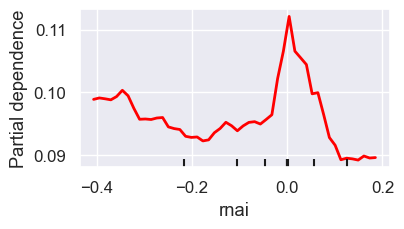

In [15]:
from sklearn.inspection import PartialDependenceDisplay 
X_t=X_train.copy() 


plt.subplots_adjust(top=0.9)  
plt.show()
#top_features = feature_importance_df['Feature'].head(4)   
feat='rnai'
top_features = [feat]
line_kw = {'color': 'red', 'linewidth': 2}

fig, ax = plt.subplots(figsize=(4, 2))
display = PartialDependenceDisplay.from_estimator(
    rfc, 
    X_t, 
    features=top_features, 
    grid_resolution=50, 
    ax=ax,    line_kw=line_kw  

)
 
# Set a title
print("")
print("")
print('Dependence of Down Regulation on '+feat)

#plt.suptitle('Dependence of Down Regulation on '+feat,fontdict={'family': 'serif',  'fontweight': 'bold', 'fontsize': 8})
plt.subplots_adjust(top=0.9)  
plt.show()
print("")



<Figure size 640x480 with 0 Axes>

['copynumber']


Dependence of Down Regulation on copynumber


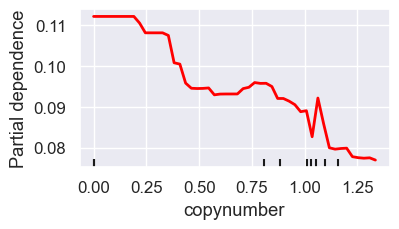

In [16]:
from sklearn.inspection import PartialDependenceDisplay 
X_t=X_train.copy() 


plt.subplots_adjust(top=0.9)  
plt.show()
#top_features = feature_importance_df['Feature'].head(4)   
feat='copynumber'
top_features = [feat]
print(top_features)
fig, ax = plt.subplots(figsize=(4, 2))
line_kw = {'color': 'red', 'linewidth': 2}
display = PartialDependenceDisplay.from_estimator(
    rfc, 
    X_t, 
    features=top_features, 
    grid_resolution=50, 
    ax=ax,line_kw=line_kw  
)
# Set a title

# Set a title
print("")
print("")
print('Dependence of Down Regulation on '+feat)
#plt.suptitle('Dependence of Down Regulation on '+feat,fontdict={'family': 'serif',  'fontweight': 'bold', 'fontsize': 8})
plt.subplots_adjust(top=0.9)  
plt.show()